# Sales Data Analysis

# TASK 1

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import seaborn as sns

In [29]:
data = pd.read_csv('DS1_C5_S3_Sales_Data_Practice.csv')
data

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,STATE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10103,26,100.00,5404.62,29-01-2003,Shipped,Classic Cars,214,S10_1949,Baane Mini Imports,Stavern,NaN,Norway,EMEA,Bergulfsen,Jonas,Medium
1,10112,29,100.00,7209.11,24-03-2003,Shipped,Classic Cars,214,S10_1949,"Volvo Model Replicas, Co",Lule,NaN,Sweden,EMEA,Berglund,Christina,Large
2,10126,38,100.00,7329.06,28-05-2003,Shipped,Classic Cars,214,S10_1949,"Corrida Auto Replicas, Ltd",Madrid,NaN,Spain,EMEA,Sommer,Mart�n,Large
3,10140,37,100.00,7374.10,24-07-2003,Shipped,Classic Cars,214,S10_1949,Technics Stores Inc.,Burlingame,CA,USA,NaN,Hirano,Juri,Large
4,10150,45,100.00,10993.50,19-09-2003,Shipped,Classic Cars,214,S10_1949,"Dragon Souveniers, Ltd.",Singapore,NaN,Singapore,Japan,Natividad,Eric,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,10358,27,100.00,3761.37,10-12-2004,Shipped,Classic Cars,101,S700_2824,Euro Shopping Channel,Madrid,NaN,Spain,EMEA,Freyre,Diego,Medium
1570,10371,34,100.00,4301.34,23-01-2005,Shipped,Classic Cars,101,S700_2824,Mini Gifts Distributors Ltd.,San Rafael,CA,USA,NaN,Nelson,Valarie,Medium
1571,10382,34,54.84,1864.56,17-02-2005,Shipped,Classic Cars,101,S700_2824,Mini Gifts Distributors Ltd.,San Rafael,CA,USA,NaN,Nelson,Valarie,Small
1572,10411,34,100.00,3576.80,01-05-2005,Shipped,Classic Cars,101,S700_2824,Quebec Home Shopping Network,Montreal,Quebec,Canada,NaN,Fresnisre,Jean,Medium


In [30]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'SALES', 'ORDERDATE',
       'STATUS', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY',
       'STATE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [31]:
data.shape

(1574, 17)

In [32]:
data.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
SALES               float64
ORDERDATE            object
STATUS               object
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
CITY                 object
STATE                object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [33]:
data.isnull().sum()

ORDERNUMBER           0
QUANTITYORDERED       0
PRICEEACH             0
SALES                 0
ORDERDATE             0
STATUS                0
PRODUCTLINE           0
MSRP                  0
PRODUCTCODE           0
CUSTOMERNAME          0
CITY                  0
STATE               856
COUNTRY               0
TERRITORY           582
CONTACTLASTNAME       0
CONTACTFIRSTNAME      0
DEALSIZE              0
dtype: int64

# TASK 2

In [34]:
def separator(data):
    categorical = []
    numerical   = []
    for i in data.columns:
        if data[i].dtypes == 'object':
            categorical.append(i)
        else:
            numerical.append(i)
    return categorical , numerical


In [35]:
categorical , numerical = separator(data)

In [36]:
categorical

['ORDERDATE',
 'STATUS',
 'PRODUCTLINE',
 'PRODUCTCODE',
 'CUSTOMERNAME',
 'CITY',
 'STATE',
 'COUNTRY',
 'TERRITORY',
 'CONTACTLASTNAME',
 'CONTACTFIRSTNAME',
 'DEALSIZE']

In [37]:
numerical

['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'SALES', 'MSRP']

In [38]:
def DA_numerical(col):
    print("unique values in the",col,"are",data[col].unique())
    print("Mean value of", col, 'is', data[col].mean())
    print("Median value of", col, 'is', data[col].median())
    print("Mode value of", col, 'is', data[col].mode())
    print("Maximum value of", col, 'is', data[col].max())
    print("minimum value of", col, 'is', data[col].min())

In [39]:
DA_numerical('PRICEEACH')

unique values in the PRICEEACH are [100.    64.93  48.05  75.47  54.68  61.99  65.63  46.9   71.47  79.65
  85.39  76.    99.04  64.    57.22  52.36  69.12  54.33  55.34  99.82
  83.63  95.93  96.73  72.38  63.38  62.09  95.35  89.38  63.84  75.01
  73.42  81.4   64.64  82.99  92.57  77.41  74.21  90.17  76.61  83.79
  69.43  93.56  81.62  67.83  70.26  97.89  93.28  64.74  75.2   88.45
  97.6   87.06  93.77  99.66  91.44  87.33  95.55  86.3   95.13  36.11
  50.18  93.16  50.14  49.06  54.99  43.13  58.22  51.21  44.21  54.45
  53.37  63.61  48.52  51.75  57.68  56.07  89.89  58.95  72.41  98.63
  52.83  99.55  56.3   42.64  74.04  82.39  79.31  88.55  63.14  73.92
  90.86  85.47  66.99  64.68  83.93  74.69  92.4   91.63  78.54  65.45
  67.76  79.22  32.47  64.69  43.05  88.    67.8   50.25  53.88  62.36
  69.62  57.51  61.15  59.33  71.44  62.96  50.85  72.65  61.75  49.04
  84.25  56.91  49.3   63.57  98.99  52.67  94.79  47.18  78.11  64.9
  52.32  83.07  91.18  89.15  93.21  88.14 

In [40]:
DA_numerical('SALES')

unique values in the SALES are [5404.62 7209.11 7329.06 ... 1864.56 3576.8  3722.32]
Mean value of SALES is 3699.3433926302414
Median value of SALES is 3372.58
Mode value of SALES is 0     1030.44
1     1459.60
2     1707.14
3     1729.00
4     1742.40
5     2257.92
6     2307.24
7     2730.00
8     2795.27
9     2935.15
10    3184.80
11    3188.12
12    3508.80
13    3525.60
14    3734.00
15    3788.40
16    4405.22
17    4910.40
18    5004.80
19    5182.00
20    5464.69
21    5565.12
22    7310.00
23    7381.16
24    8014.82
Name: SALES, dtype: float64
Maximum value of SALES is 14082.8
minimum value of SALES is 541.14


In [41]:
DA_numerical('MSRP')

unique values in the MSRP are [214 136 147 194 207 151 117 173  79 115 141 102  53 124 170  77 142 163
  60 127 168 132 101  62 104 169  80  99 146 105 143  92  87  50 148  71
  73  57  33  44  90  35  37  88  85  61  65 107  83 140  41 118  97  68
  43]
Mean value of MSRP is 106.99555273189327
Median value of MSRP is 102.0
Mode value of MSRP is 0    101
Name: MSRP, dtype: int64
Maximum value of MSRP is 214
minimum value of MSRP is 33


In [42]:
def DA_categorical(col):
    print("\nunique values in the",col,"are",data[col].unique())
    print("\nunique values count in the",col,"are",data[col].nunique())
    print("\nMode value of", col, 'is', data[col].mode())

In [43]:
categorical

['ORDERDATE',
 'STATUS',
 'PRODUCTLINE',
 'PRODUCTCODE',
 'CUSTOMERNAME',
 'CITY',
 'STATE',
 'COUNTRY',
 'TERRITORY',
 'CONTACTLASTNAME',
 'CONTACTFIRSTNAME',
 'DEALSIZE']

In [44]:
DA_categorical('PRODUCTLINE')


unique values in the PRODUCTLINE are ['Classic Cars' 'Vintage Cars']

unique values count in the PRODUCTLINE are 2

Mode value of PRODUCTLINE is 0    Classic Cars
Name: PRODUCTLINE, dtype: object


In [45]:
DA_categorical('CUSTOMERNAME')


unique values in the CUSTOMERNAME are ['Baane Mini Imports' 'Volvo Model Replicas, Co'
 'Corrida Auto Replicas, Ltd' 'Technics Stores Inc.'
 'Dragon Souveniers, Ltd.' 'Classic Legends Inc.'
 'Australian Gift Network, Co' 'Classic Gift Ideas, Inc'
 'Saveley & Henriot, Co.' 'Canadian Gift Exchange Network'
 'West Coast Collectables Co.' 'Cambridge Collectables Co.'
 'Super Scale Inc.' 'Tokyo Collectables, Ltd' 'Souveniers And Things Co.'
 'Amica Models & Co.' 'Scandinavian Gift Ideas' 'Auto Assoc. & Cie.'
 'Mini Gifts Distributors Ltd.' 'Online Diecast Creations Co.'
 'Mini Wheels Co.' 'Australian Collectors, Co.'
 'Collectables For Less Inc.' 'Corporate Gift Ideas Co.'
 "Anna's Decorations, Ltd" 'Quebec Home Shopping Network'
 'Euro Shopping Channel' 'Danish Wholesale Imports'
 'Salzburg Collectables' 'Stylish Desk Decors, Co.' 'Mini Creations Ltd.'
 'Toys of Finland, Co.' 'Alpha Cognac' 'Double Decker Gift Stores, Ltd'
 'Enaco Distributors' "Men 'R' US Retailers, Ltd."
 'Collectable M

In [46]:
DA_categorical('COUNTRY')


unique values in the COUNTRY are ['Norway' 'Sweden' 'Spain' 'USA' 'Singapore' 'Australia' 'France' 'Canada'
 'Japan' 'Italy' 'Denmark' 'Austria' 'UK' 'Finland' 'Belgium'
 'Philippines' 'Germany' 'Switzerland' 'Ireland']

unique values count in the COUNTRY are 19

Mode value of COUNTRY is 0    USA
Name: COUNTRY, dtype: object


# TASK 3

PRICEEACH - Mean: 83.79266836086404 Median: 100.0 Std Dev: 21.390441196159472 Skewness: -1.0437098238570153
SALES - Mean: 3699.3433926302414 Median: 3372.58 Std Dev: 2003.3456884795773 Skewness: 1.0663192512970485
MSRP - Mean: 106.99555273189327 Median: 102.0 Std Dev: 45.3372820910747 Skewness: 0.3071338149883141


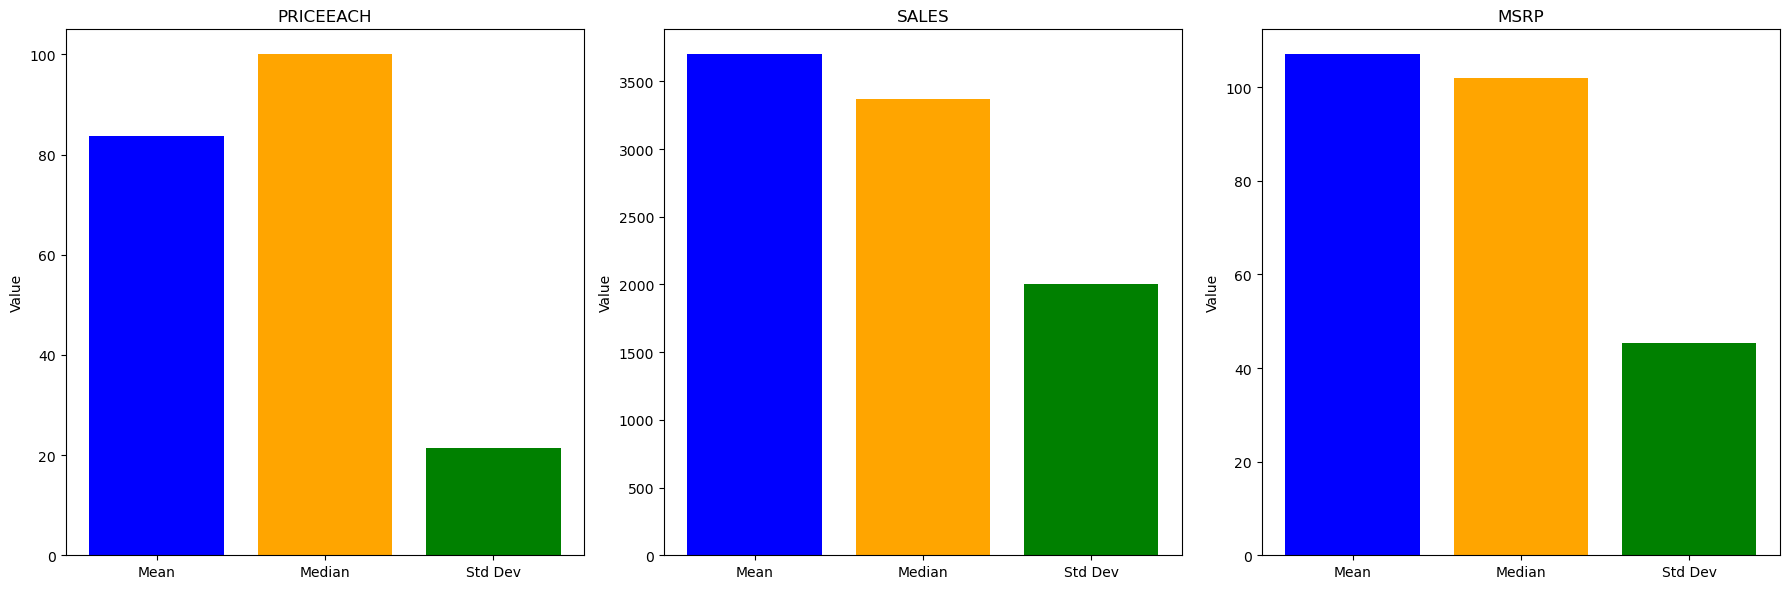

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew



# Measures of Central Tendency and Dispersion
def describe_column(column):
    mean = column.mean()
    median = column.median()
    std_dev = column.std()
    skewness = skew(column)
    return mean, median, std_dev, skewness

# Analysis for PRICEEACH
priceeach_mean, priceeach_median, priceeach_std, priceeach_skew = describe_column(data['PRICEEACH'])
print("PRICEEACH - Mean:", priceeach_mean, "Median:", priceeach_median, "Std Dev:", priceeach_std, "Skewness:", priceeach_skew)

# Analysis for SALES
sales_mean, sales_median, sales_std, sales_skew = describe_column(data['SALES'])
print("SALES - Mean:", sales_mean, "Median:", sales_median, "Std Dev:", sales_std, "Skewness:", sales_skew)

# Analysis for MSRP
msrp_mean, msrp_median, msrp_std, msrp_skew = describe_column(data['MSRP'])
print("MSRP - Mean:", msrp_mean, "Median:", msrp_median, "Std Dev:", msrp_std, "Skewness:", msrp_skew)

# Visualization
# Bar Chart for Mean, Median, and Standard Deviation
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

def plot_bar_chart(ax, title, mean, median, std_dev):
    metrics = ['Mean', 'Median', 'Std Dev']
    values = [mean, median, std_dev]
    ax.bar(metrics, values, color=['blue', 'orange', 'green'])
    ax.set_title(title)
    ax.set_ylabel('Value')

plot_bar_chart(ax[0], 'PRICEEACH', priceeach_mean, priceeach_median, priceeach_std)
plot_bar_chart(ax[1], 'SALES', sales_mean, sales_median, sales_std)
plot_bar_chart(ax[2], 'MSRP', msrp_mean, msrp_median, msrp_std)

plt.tight_layout()
plt.show()

# TASK 4

PRODUCTLINE Frequency Distribution:
PRODUCTLINE
Classic Cars    967
Vintage Cars    607
Name: count, dtype: int64

CUSTOMERNAME Frequency Distribution:
CUSTOMERNAME
Euro Shopping Channel           153
Mini Gifts Distributors Ltd.    116
AV Stores, Co.                   41
Muscle Machine Inc               39
Online Diecast Creations Co.     31
                               ... 
Gift Ideas Corp.                  4
Auto-Moto Classics Inc.           3
Tekni Collectables Inc.           3
Boards & Toys Co.                 2
Daedalus Designs Imports          2
Name: count, Length: 92, dtype: int64

COUNTRY Frequency Distribution:
COUNTRY
USA            553
Spain          194
France         156
Australia      111
UK              85
Italy           69
Norway          49
Singapore       46
Finland         45
Germany         45
Denmark         41
Austria         35
Switzerland     31
Canada          29
Sweden          29
Belgium         18
Japan           17
Philippines     14
Ireland          7

C:\Users\user\AppData\Local\Temp\ipykernel_13524\42511050.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(freq_series.index, rotation=90)


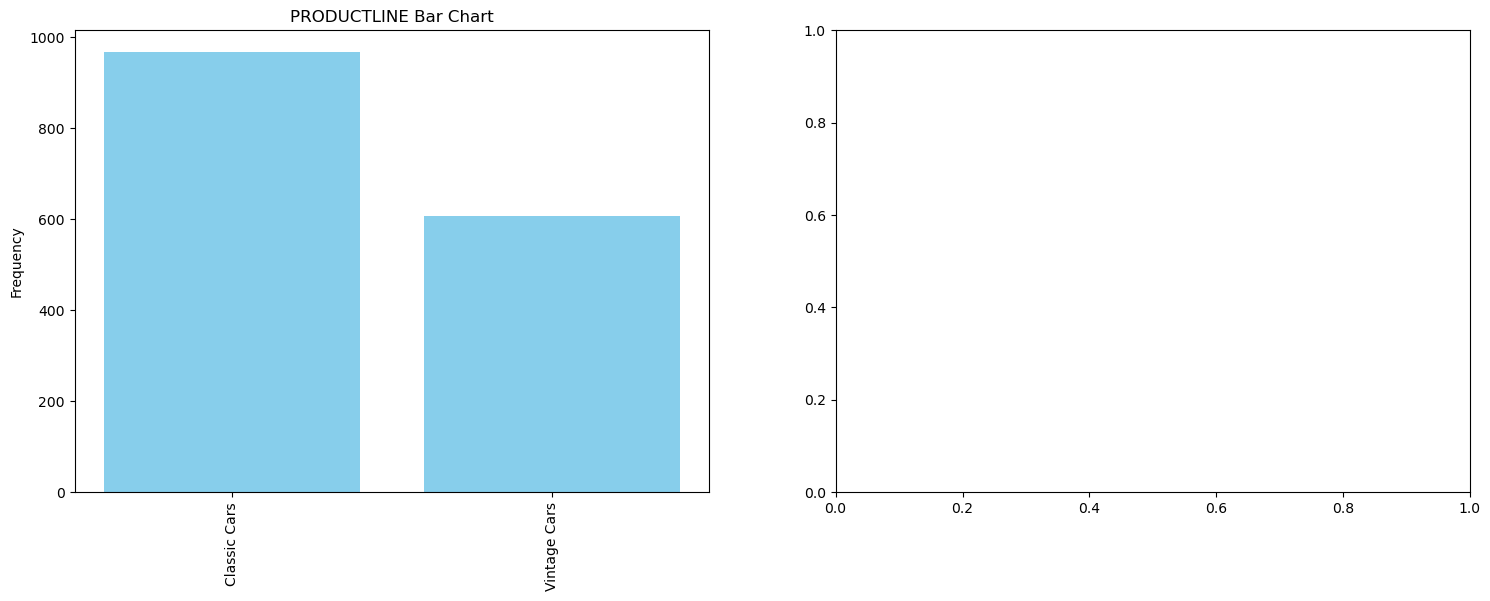

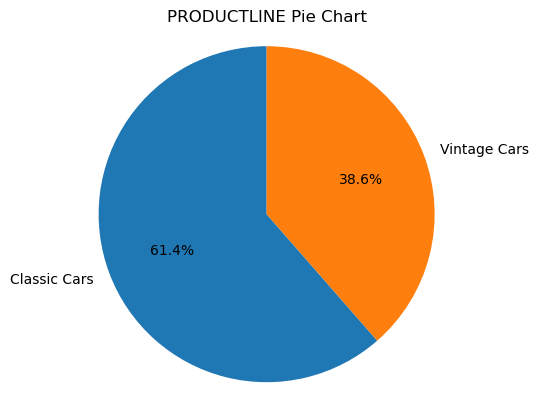

<Figure size 640x480 with 0 Axes>

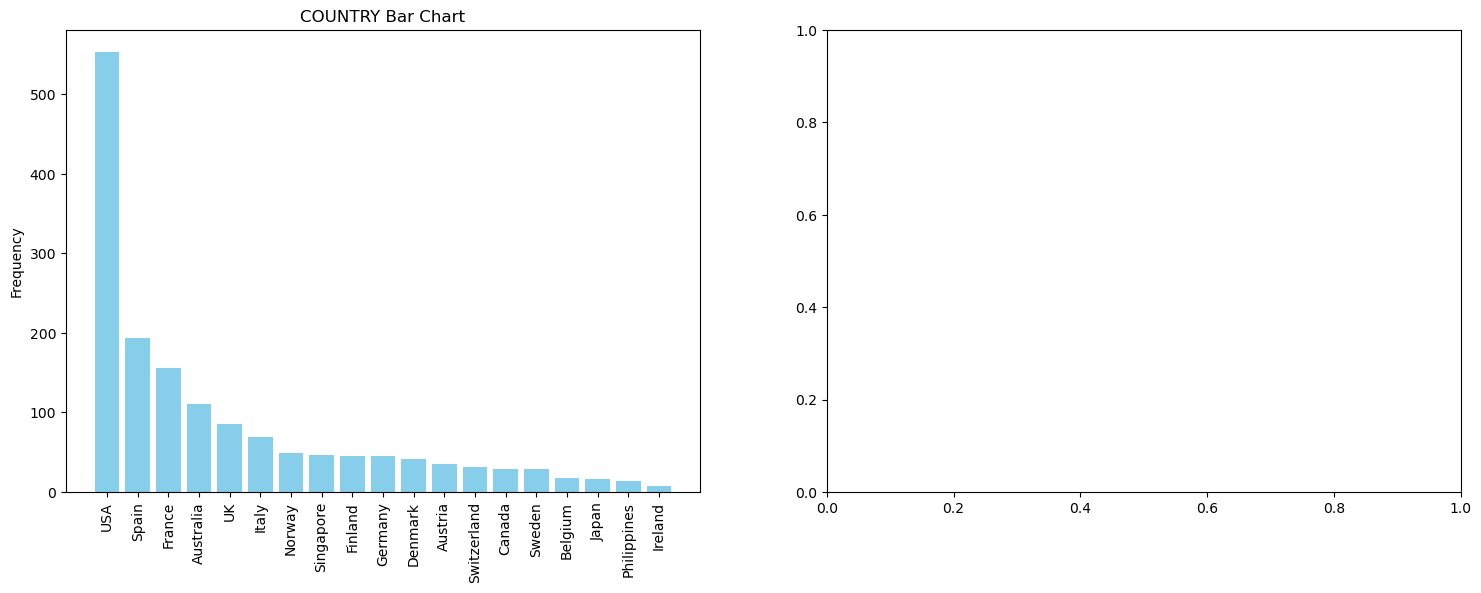

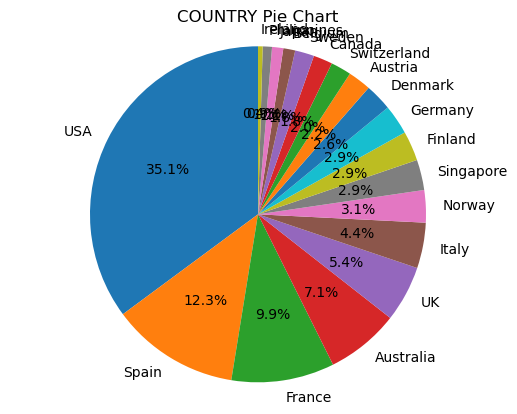

<Figure size 640x480 with 0 Axes>

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Frequency Distribution
def get_frequency_distribution(column):
    return column.value_counts()

# Analysis for PRODUCTLINE
productline_freq = get_frequency_distribution(data['PRODUCTLINE'])
print("PRODUCTLINE Frequency Distribution:")
print(productline_freq)

# Analysis for CUSTOMERNAME
customername_freq = get_frequency_distribution(data['CUSTOMERNAME'])
print("\nCUSTOMERNAME Frequency Distribution:")
print(customername_freq)

# Analysis for COUNTRY
country_freq = get_frequency_distribution(data['COUNTRY'])
print("\nCOUNTRY Frequency Distribution:")
print(country_freq)

# Visualization
def plot_bar_chart(ax, title, freq_series):
    ax.bar(freq_series.index, freq_series.values, color='skyblue')
    ax.set_title(title)
    ax.set_ylabel('Frequency')
    ax.set_xticklabels(freq_series.index, rotation=90)

def plot_pie_chart(title, freq_series):
    fig, ax = plt.subplots()
    ax.pie(freq_series, labels=freq_series.index, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    ax.set_title(title)
    plt.show()

# Plot for PRODUCTLINE
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
plot_bar_chart(ax[0], 'PRODUCTLINE Bar Chart', productline_freq)
plot_pie_chart('PRODUCTLINE Pie Chart', productline_freq)
plt.tight_layout()
plt.show()


# Plot for COUNTRY
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
plot_bar_chart(ax[0], 'COUNTRY Bar Chart', country_freq)
plot_pie_chart('COUNTRY Pie Chart', country_freq)
plt.tight_layout()
plt.show()
